Crear un csv

In [1]:
import csv
import os

class Persona():
    lista = []
    archivo_csv = "usuarios.csv"

    def __init__(self, nombre, correo):
        self.nombre = nombre
        self.correo = correo

    def registrar(self):
        Persona.lista.append(self)
        # Guardamos automáticamente al registrar
        self.guardar_en_csv()
        print(f"La persona {self.nombre} ha sido registrada.")

    def guardar_en_csv(self):
        # El modo 'a' agrega al final sin borrar lo anterior
        with open(Persona.archivo_csv, mode='a', newline='', encoding='utf-8') as archivo:
            writer = csv.writer(archivo)
            writer.writerow([self.nombre, self.correo])

    @classmethod
    def cargar_desde_csv(cls):
        """Lee el CSV y llena la lista de objetos"""
        if os.path.exists(cls.archivo_csv):
            cls.lista = [] # Limpiamos la lista actual para no duplicar
            with open(cls.archivo_csv, mode='r', encoding='utf-8') as archivo:
                reader = csv.reader(archivo)
                for fila in reader:
                    if fila: # Evitar líneas vacías
                        # Creamos el objeto sin volver a ejecutar registrar() 
                        # para no crear un bucle infinito de guardado
                        nueva_persona = cls(fila[0], fila[1])
                        cls.lista.append(nueva_persona)
            print("Datos cargados correctamente desde el CSV.")
        else:
            print("El archivo no existe aún.")

    @classmethod
    def personas_registradas(cls):
        print("\n--- Personas en Memoria ---")
        for p in cls.lista:
            print(f"- {p.nombre} ({p.correo})")

In [2]:
Persona.cargar_desde_csv()

# 2. Lista de 10 usuarios para registrar
datos_prueba = [
    ("Alejandro", "ale@mail.com"), ("Beatriz", "bea@mail.com"),
    ("Carlos", "charles@mail.com"), ("Daniela", "dani@mail.com"),
    ("Eduardo", "edu@mail.com"), ("Fernanda", "fer@mail.com"),
    ("Gerardo", "ger@mail.com"), ("Hilda", "hilda@mail.com"),
    ("Ivan", "ivan@mail.com"), ("Jimena", "jime@mail.com")
]

print("\nProcesando registros...")
for nombre, correo in datos_prueba:
    p = Persona(nombre, correo)
    p.registrar()

# 3. Ver todo lo que hay ahora en la lista (memoria)
Persona.personas_registradas()

El archivo no existe aún.

Procesando registros...
La persona Alejandro ha sido registrada.
La persona Beatriz ha sido registrada.
La persona Carlos ha sido registrada.
La persona Daniela ha sido registrada.
La persona Eduardo ha sido registrada.
La persona Fernanda ha sido registrada.
La persona Gerardo ha sido registrada.
La persona Hilda ha sido registrada.
La persona Ivan ha sido registrada.
La persona Jimena ha sido registrada.

--- Personas en Memoria ---
- Alejandro (ale@mail.com)
- Beatriz (bea@mail.com)
- Carlos (charles@mail.com)
- Daniela (dani@mail.com)
- Eduardo (edu@mail.com)
- Fernanda (fer@mail.com)
- Gerardo (ger@mail.com)
- Hilda (hilda@mail.com)
- Ivan (ivan@mail.com)
- Jimena (jime@mail.com)


In [3]:
# Cargamos lo que ya existe para no perder la lista
Persona.cargar_desde_csv()

# Creamos y registramos 5 personas de forma individual
p11 = Persona("Kevin", "kevin@ejemplo.com")
p11.registrar()

p12 = Persona("Laura", "lau@ejemplo.com")
p12.registrar()

p13 = Persona("Miguel", "mike@ejemplo.com")
p13.registrar()

p14 = Persona("Natalia", "nat@ejemplo.com")
p14.registrar()

p15 = Persona("Oscar", "oscar@ejemplo.com")
p15.registrar()

# Mostramos el total de personas acumuladas
Persona.personas_registradas()

Datos cargados correctamente desde el CSV.
La persona Kevin ha sido registrada.
La persona Laura ha sido registrada.
La persona Miguel ha sido registrada.
La persona Natalia ha sido registrada.
La persona Oscar ha sido registrada.

--- Personas en Memoria ---
- Alejandro (ale@mail.com)
- Beatriz (bea@mail.com)
- Carlos (charles@mail.com)
- Daniela (dani@mail.com)
- Eduardo (edu@mail.com)
- Fernanda (fer@mail.com)
- Gerardo (ger@mail.com)
- Hilda (hilda@mail.com)
- Ivan (ivan@mail.com)
- Jimena (jime@mail.com)
- Kevin (kevin@ejemplo.com)
- Laura (lau@ejemplo.com)
- Miguel (mike@ejemplo.com)
- Natalia (nat@ejemplo.com)
- Oscar (oscar@ejemplo.com)


In [5]:
import pandas as pd

df=pd.read_csv("usuarios.csv")
df

,Alejandro,ale@mail.com
0,Beatriz,bea@mail.com
1,Carlos,charles@mail.com
2,Daniela,dani@mail.com
3,Eduardo,edu@mail.com
4,Fernanda,fer@mail.com
5,Gerardo,ger@mail.com
6,Hilda,hilda@mail.com
7,Ivan,ivan@mail.com
8,Jimena,jime@mail.com
9,Kevin,kevin@ejemplo.com


In [6]:
import csv
import os
from datetime import datetime

class Persona():
    lista = []
    archivo_csv = "datos_usuarios_analisis.csv"

    def __init__(self, nombre, correo, edad, genero, ciudad, ocupacion, 
                 ingreso_anual, score_credito, nivel_educativo, 
                 suscripcion_tipo, horas_uso_semanal):
        # Atributos básicos
        self.nombre = nombre
        self.correo = correo
        
        # Atributos para Ciencia de Datos
        self.edad = int(edad)
        self.genero = genero
        self.ciudad = ciudad
        self.ocupacion = ocupacion
        self.ingreso_anual = float(ingreso_anual)
        self.score_credito = int(score_credito)
        self.nivel_educativo = nivel_educativo
        self.suscripcion_tipo = suscripcion_tipo
        self.horas_uso_semanal = float(horas_uso_semanal)
        self.fecha_registro = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

    def registrar(self):
        Persona.lista.append(self)
        self.guardar_en_csv()
        print(f"La persona {self.nombre} ha sido registrada exitosamente.")

    def guardar_en_csv(self):
        # Verificamos si el archivo existe para saber si poner encabezados
        archivo_existe = os.path.exists(Persona.archivo_csv)
        
        with open(Persona.archivo_csv, mode='a', newline='', encoding='utf-8') as archivo:
            writer = csv.writer(archivo)
            
            # Si el archivo es nuevo, escribimos los nombres de las columnas
            if not archivo_existe:
                writer.writerow([
                    "Nombre", "Correo", "Edad", "Genero", "Ciudad", 
                    "Ocupacion", "Ingreso_Anual", "Score_Credito", 
                    "Nivel_Educativo", "Suscripcion_Tipo", 
                    "Horas_Uso_Semanal", "Fecha_Registro"
                ])
            
            writer.writerow([
                self.nombre, self.correo, self.edad, self.genero, self.ciudad,
                self.ocupacion, self.ingreso_anual, self.score_credito,
                self.nivel_educativo, self.suscripcion_tipo, 
                self.horas_uso_semanal, self.fecha_registro
            ])

    @classmethod
    def cargar_desde_csv(cls):
        if os.path.exists(cls.archivo_csv):
            cls.lista = [] 
            with open(cls.archivo_csv, mode='r', encoding='utf-8') as archivo:
                reader = csv.reader(archivo)
                next(reader) # Saltar encabezados
                for fila in reader:
                    if fila:
                        # Re-instanciamos con los tipos de datos correctos
                        p = cls(fila[0], fila[1], fila[2], fila[3], fila[4], 
                                fila[5], fila[6], fila[7], fila[8], fila[9], fila[10])
                        # Recuperamos la fecha original del archivo
                        p.fecha_registro = fila[11]
                        cls.lista.append(p)
            print("Datos cargados correctamente para análisis.")
        else:
            print("No hay registros previos.")

    @classmethod
    def personas_registradas(cls):
        print("\n--- Personas en Memoria (Dataset) ---")
        for p in cls.lista:
            print(f"- {p.nombre} | {p.ocupacion} | {p.ingreso_anual} USD | {p.suscripcion_tipo}")

In [7]:
# --- CREACIÓN DE 15 OBJETOS  ---

# Persona(nombre, correo, edad, genero, ciudad, ocupacion, ingreso_anual, score_credito, nivel_educativo, suscripcion_tipo, horas_uso_semanal)

p1 = Persona("Juan Carlos Ruiz", "jc.ruiz@mail.mx", 28, "Masculino", "CDMX", "Ingeniero de Software", 450000, 720, "Licenciatura", "Premium", 12.5)
p1.registrar()

p2 = Persona("Ana Karen López", "ak.lopez@mail.mx", 34, "Femenino", "Guadalajara", "Médico Cirujano", 620000, 810, "Especialidad", "Premium", 5.0)
p2.registrar()

p3 = Persona("Luis Angel Gomez", "lagomez@mail.mx", 22, "Masculino", "Monterrey", "Estudiante", 120000, 640, "Bachillerato", "Gratis", 25.5)
p3.registrar()

p4 = Persona("Marta Elena Sanz", "m.sanz@mail.mx", 45, "Femenino", "Puebla", "Gerente de Ventas", 550000, 750, "Licenciatura", "Estándar", 8.0)
p4.registrar()

p5 = Persona("Jorge Vigil", "jvigil@mail.mx", 31, "Masculino", "Querétaro", "Analista de Datos", 380000, 690, "Licenciatura", "Estándar", 15.2)
p5.registrar()

p6 = Persona("Elena Toro", "etoro@mail.mx", 29, "Femenino", "Mérida", "Diseñadora Gráfica", 320000, 710, "Licenciatura", "Gratis", 20.0)
p6.registrar()

p7 = Persona("Pedro Picó", "ppico@mail.mx", 52, "Masculino", "Tijuana", "Consultor Fiscal", 700000, 830, "Doctorado", "Premium", 4.5)
p7.registrar()

p8 = Persona("Sofía Vega", "svega@mail.mx", 26, "Femenino", "León", "Community Manager", 280000, 670, "Licenciatura", "Gratis", 18.5)
p8.registrar()

p9 = Persona("Raúl Peña", "rpena@mail.mx", 39, "Masculino", "Toluca", "Arquitecto", 480000, 740, "Maestría", "Estándar", 10.0)
p9.registrar()

p10 = Persona("Lucía Mar", "lmar@mail.mx", 24, "Femenino", "CDMX", "Programadora Frontend", 400000, 705, "Licenciatura", "Premium", 30.0)
p10.registrar()

p11 = Persona("Kevin Moreno", "kmoreno@mail.mx", 21, "Masculino", "San Luis Potosí", "Pasante", 150000, 620, "Licenciatura", "Gratis", 14.0)
p11.registrar()

p12 = Persona("Laura Cid", "lcid@mail.mx", 33, "Femenino", "Cancún", "Abogada", 580000, 790, "Maestría", "Premium", 6.5)
p12.registrar()

p13 = Persona("Miguel Reyes", "mreyes@mail.mx", 41, "Masculino", "Veracruz", "Chef Ejecutivo", 350000, 680, "Técnico Superior", "Estándar", 11.0)
p13.registrar()

p14 = Persona("Natalia Rojas", "nrojas@mail.mx", 27, "Femenino", "Aguascalientes", "Enfermera", 310000, 725, "Licenciatura", "Estándar", 9.5)
p14.registrar()

p15 = Persona("Oscar Gil", "ogil@mail.mx", 48, "Masculino", "Chihuahua", "Contador Público", 520000, 770, "Licenciatura", "Premium", 7.2)
p15.registrar()

# Verificamos la carga final
Persona.personas_registradas()

La persona Juan Carlos Ruiz ha sido registrada exitosamente.
La persona Ana Karen López ha sido registrada exitosamente.
La persona Luis Angel Gomez ha sido registrada exitosamente.
La persona Marta Elena Sanz ha sido registrada exitosamente.
La persona Jorge Vigil ha sido registrada exitosamente.
La persona Elena Toro ha sido registrada exitosamente.
La persona Pedro Picó ha sido registrada exitosamente.
La persona Sofía Vega ha sido registrada exitosamente.
La persona Raúl Peña ha sido registrada exitosamente.
La persona Lucía Mar ha sido registrada exitosamente.
La persona Kevin Moreno ha sido registrada exitosamente.
La persona Laura Cid ha sido registrada exitosamente.
La persona Miguel Reyes ha sido registrada exitosamente.
La persona Natalia Rojas ha sido registrada exitosamente.
La persona Oscar Gil ha sido registrada exitosamente.

--- Personas en Memoria (Dataset) ---
- Juan Carlos Ruiz | Ingeniero de Software | 450000.0 USD | Premium
- Ana Karen López | Médico Cirujano | 620

In [8]:
import pandas as pd

df2=pd.read_csv("datos_usuarios_analisis.csv")
df2

,Nombre,Correo,Edad,Genero,Ciudad,Ocupacion,Ingreso_Anual,Score_Credito,Nivel_Educativo,Suscripcion_Tipo,Horas_Uso_Semanal,Fecha_Registro
0,Juan Carlos Ruiz,jc.ruiz@mail.mx,28,Masculino,CDMX,Ingeniero de Software,450000.0,720,Licenciatura,Premium,12.5,2026-02-03 16:14:35
1,Ana Karen López,ak.lopez@mail.mx,34,Femenino,Guadalajara,Médico Cirujano,620000.0,810,Especialidad,Premium,5.0,2026-02-03 16:14:35
2,Luis Angel Gomez,lagomez@mail.mx,22,Masculino,Monterrey,Estudiante,120000.0,640,Bachillerato,Gratis,25.5,2026-02-03 16:14:35
3,Marta Elena Sanz,m.sanz@mail.mx,45,Femenino,Puebla,Gerente de Ventas,550000.0,750,Licenciatura,Estándar,8.0,2026-02-03 16:14:35
4,Jorge Vigil,jvigil@mail.mx,31,Masculino,Querétaro,Analista de Datos,380000.0,690,Licenciatura,Estándar,15.2,2026-02-03 16:14:35
5,Elena Toro,etoro@mail.mx,29,Femenino,Mérida,Diseñadora Gráfica,320000.0,710,Licenciatura,Gratis,20.0,2026-02-03 16:14:35
6,Pedro Picó,ppico@mail.mx,52,Masculino,Tijuana,Consultor Fiscal,700000.0,830,Doctorado,Premium,4.5,2026-02-03 16:14:35
7,Sofía Vega,svega@mail.mx,26,Femenino,León,Community Manager,280000.0,670,Licenciatura,Gratis,18.5,2026-02-03 16:14:35
8,Raúl Peña,rpena@mail.mx,39,Masculino,Toluca,Arquitecto,480000.0,740,Maestría,Estándar,10.0,2026-02-03 16:14:35
9,Lucía Mar,lmar@mail.mx,24,Femenino,CDMX,Programadora Frontend,400000.0,705,Licenciatura,Premium,30.0,2026-02-03 16:14:35


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar los datos
df2=pd.read_csv("datos_usuarios_analisis.csv")


# 2. Inspección inicial
print("--- Primeras 5 filas ---")
df2.head()


--- Primeras 5 filas ---


,Nombre,Correo,Edad,Genero,Ciudad,Ocupacion,Ingreso_Anual,Score_Credito,Nivel_Educativo,Suscripcion_Tipo,Horas_Uso_Semanal,Fecha_Registro
0,Juan Carlos Ruiz,jc.ruiz@mail.mx,28,Masculino,CDMX,Ingeniero de Software,450000.0,720,Licenciatura,Premium,12.5,2026-02-03 16:14:35
1,Ana Karen López,ak.lopez@mail.mx,34,Femenino,Guadalajara,Médico Cirujano,620000.0,810,Especialidad,Premium,5.0,2026-02-03 16:14:35
2,Luis Angel Gomez,lagomez@mail.mx,22,Masculino,Monterrey,Estudiante,120000.0,640,Bachillerato,Gratis,25.5,2026-02-03 16:14:35
3,Marta Elena Sanz,m.sanz@mail.mx,45,Femenino,Puebla,Gerente de Ventas,550000.0,750,Licenciatura,Estándar,8.0,2026-02-03 16:14:35
4,Jorge Vigil,jvigil@mail.mx,31,Masculino,Querétaro,Analista de Datos,380000.0,690,Licenciatura,Estándar,15.2,2026-02-03 16:14:35


In [12]:
print("\n--- Información General ---")
df2.info()


--- Información General ---
<class 'pandas.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Nombre             15 non-null     str    
 1   Correo             15 non-null     str    
 2   Edad               15 non-null     int64  
 3   Genero             15 non-null     str    
 4   Ciudad             15 non-null     str    
 5   Ocupacion          15 non-null     str    
 6   Ingreso_Anual      15 non-null     float64
 7   Score_Credito      15 non-null     int64  
 8   Nivel_Educativo    15 non-null     str    
 9   Suscripcion_Tipo   15 non-null     str    
 10  Horas_Uso_Semanal  15 non-null     float64
 11  Fecha_Registro     15 non-null     str    
dtypes: float64(2), int64(2), str(8)
memory usage: 1.5 KB


In [13]:
print("\n--- Estadísticas Descriptivas ---")
df2.describe()


--- Estadísticas Descriptivas ---


,Edad,Ingreso_Anual,Score_Credito,Horas_Uso_Semanal
count,15.000000,15.000000,15.000000,15.000000
mean,33.333333,414000.000000,723.333333,13.160000
std,9.655988,166123.878046,60.049583,7.524228
min,21.000000,120000.000000,620.000000,4.500000
25%,26.500000,315000.000000,685.000000,7.600000
50%,31.000000,400000.000000,720.000000,11.000000
75%,40.000000,535000.000000,760.000000,16.850000
max,52.000000,700000.000000,830.000000,30.000000


C:\Users\Jaime\AppData\Local\Temp\ipykernel_10252\977454660.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genero', y='Ingreso_Anual', data=df2, palette='Set2')


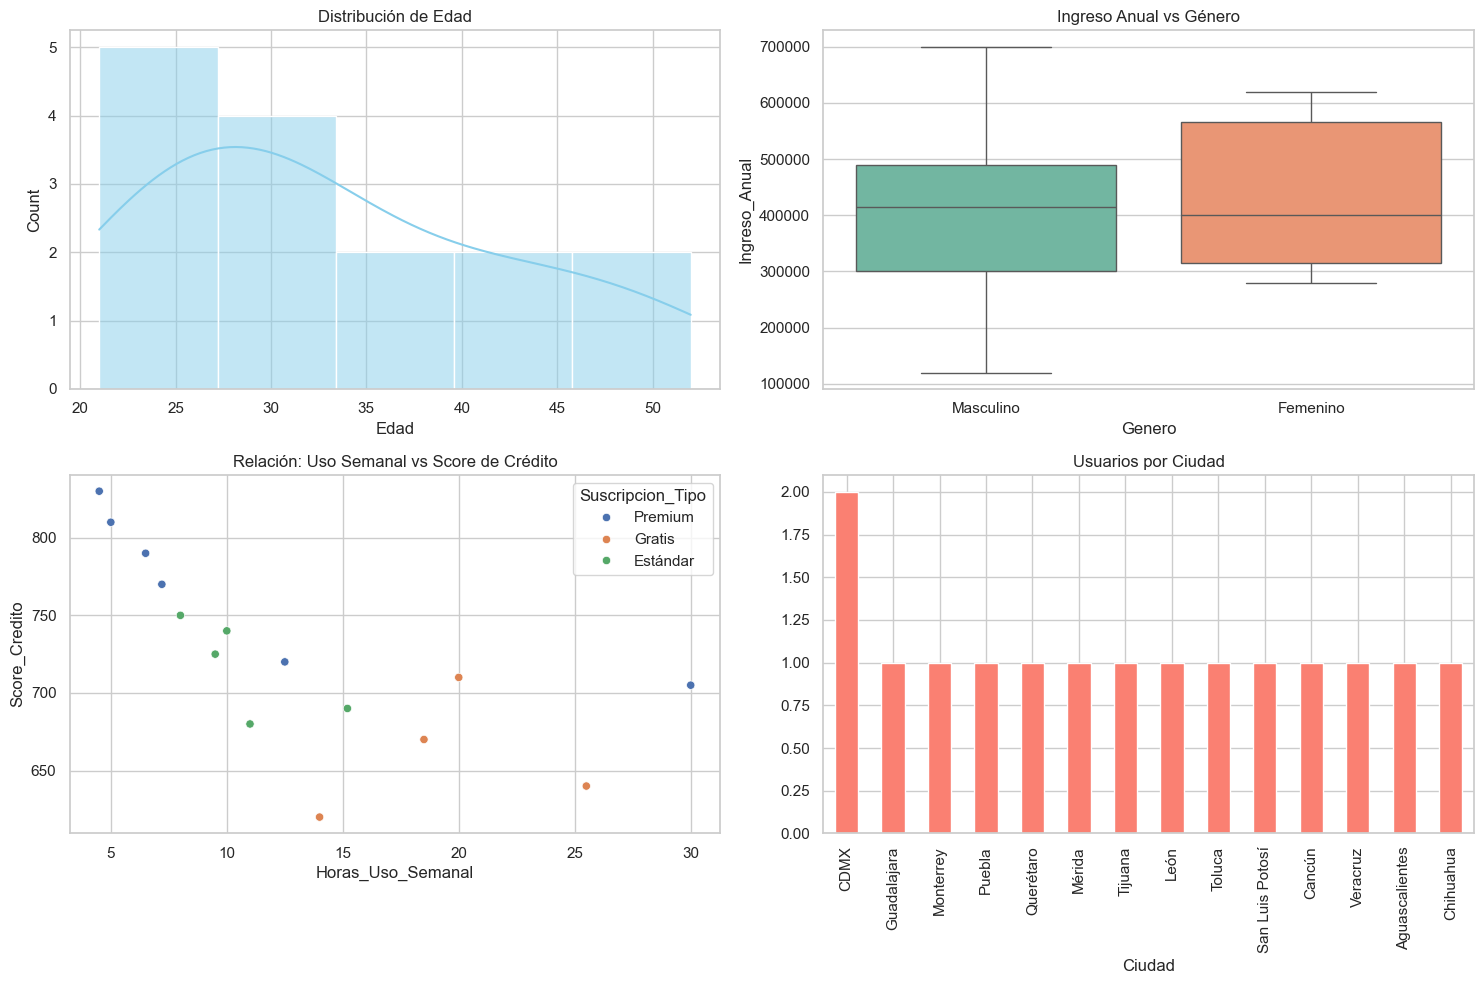

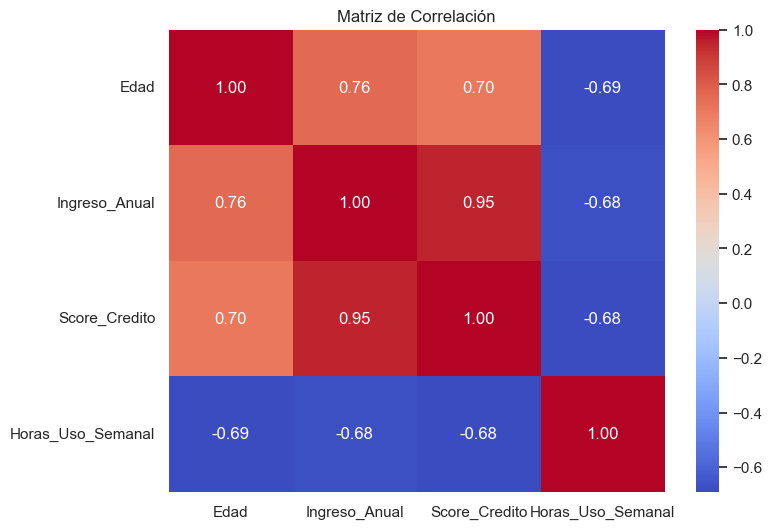

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


# 3. Visualización para el EDA
sns.set_theme(style="whitegrid")

# Crear una figura con varios subplots
plt.figure(figsize=(15, 10))

# A. Distribución de Edad
plt.subplot(2, 2, 1)
sns.histplot(df2['Edad'], kde=True, color='skyblue')
plt.title('Distribución de Edad')

# B. Ingreso Anual por Género
plt.subplot(2, 2, 2)
sns.boxplot(x='Genero', y='Ingreso_Anual', data=df2, palette='Set2')
plt.title('Ingreso Anual vs Género')

# C. Score de Crédito vs Horas de Uso
plt.subplot(2, 2, 3)
sns.scatterplot(x='Horas_Uso_Semanal', y='Score_Credito', hue='Suscripcion_Tipo', data=df2)
plt.title('Relación: Uso Semanal vs Score de Crédito')

# D. Conteo de Usuarios por Ciudad
plt.subplot(2, 2, 4)
df2['Ciudad'].value_counts().plot(kind='bar', color='salmon')
plt.title('Usuarios por Ciudad')

plt.tight_layout()
plt.show()

# 4. Matriz de Correlación (Solo numéricos)
plt.figure(figsize=(8, 6))
# Filtramos solo columnas numéricas para la correlación
columnas_numericas = df2.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(df2[columnas_numericas].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

<Figure size 1200x800 with 0 Axes>

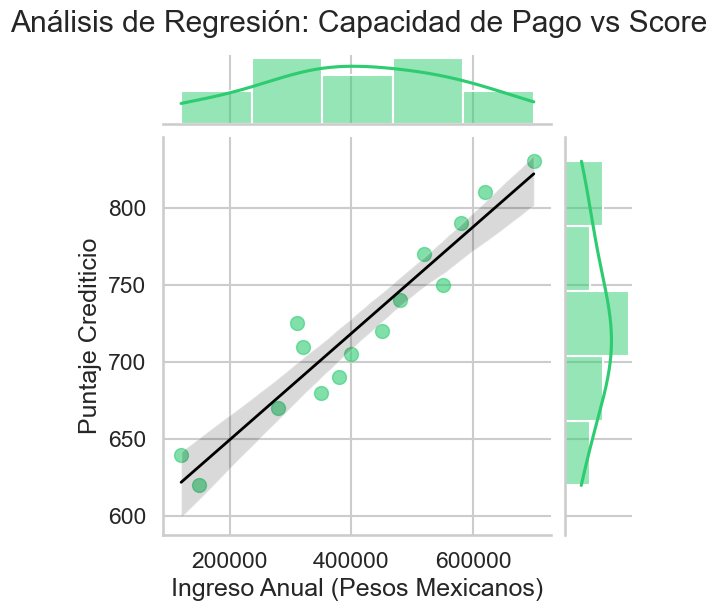

C:\Users\Jaime\AppData\Local\Temp\ipykernel_10252\4168324197.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Suscripcion_Tipo', y='Score_Credito', data=df2, palette="muted")


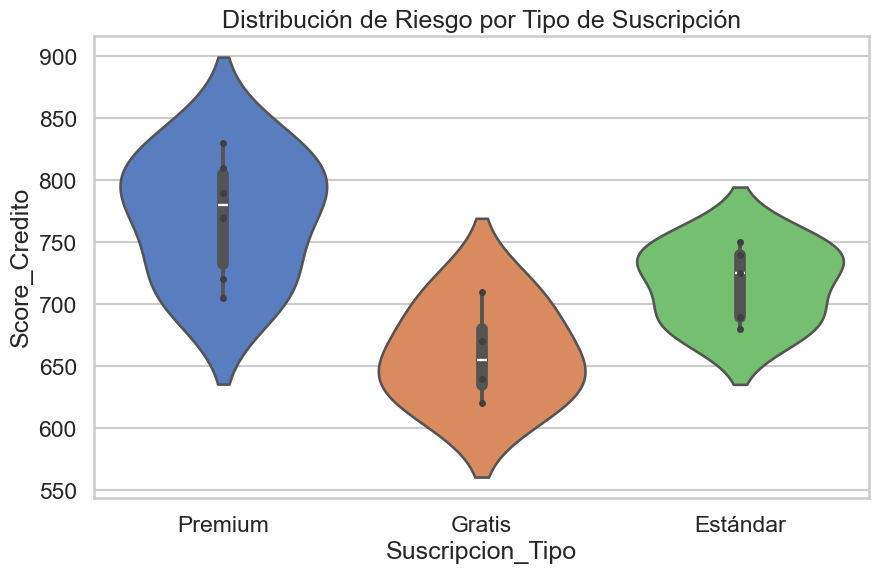

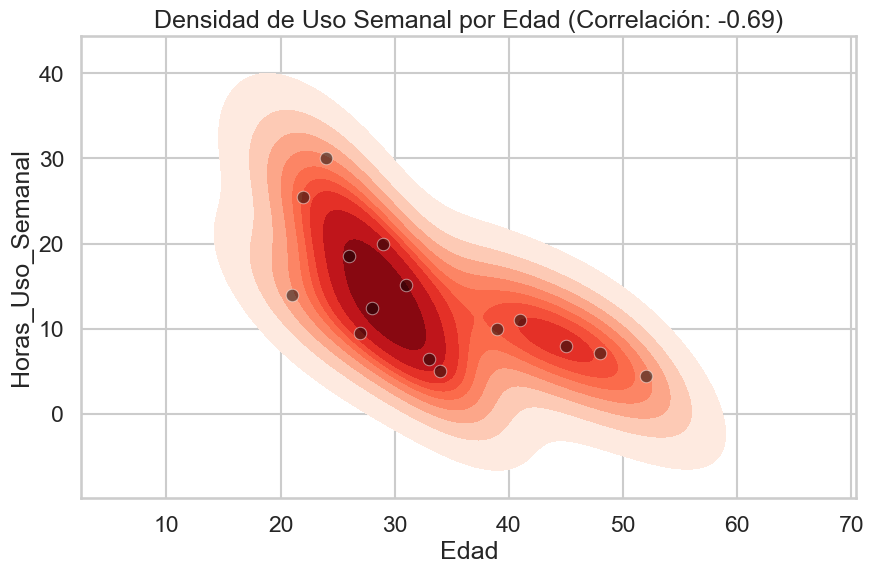

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Limpieza rápida (Standard Data Science Practice)
# Convertimos a numérico por si algo se cargó como string
cols_interes = ['Edad', 'Ingreso_Anual', 'Score_Credito', 'Horas_Uso_Semanal']
for col in cols_interes:
    df2[col] = pd.to_numeric(df2[col], errors='coerce')

# 2. Configuración de estilo 'Data Viz'
sns.set_context("talk") # Hace que las etiquetas sean más legibles
plt.figure(figsize=(12, 8))

# --- GRÁFICA: EL "CORE" DEL NEGOCIO (Ingreso vs Score) ---
# Usamos un jointplot para ver la regresión y la distribución al mismo tiempo
g = sns.jointplot(x='Ingreso_Anual', y='Score_Credito', data=df2, 
                  kind="reg", color="#2ecc71", 
                  scatter_kws={'s': 100, 'alpha': 0.6},
                  line_kws={'color': 'black', 'lw': 2})

g.fig.suptitle('Análisis de Regresión: Capacidad de Pago vs Score', y=1.03)
g.set_axis_labels('Ingreso Anual (Pesos Mexicanos)', 'Puntaje Crediticio')
plt.show()

# --- GRÁFICA: SEGMENTACIÓN POR CATEGORÍA ---
# ¿Cómo se distribuye el score según el tipo de suscripción? 
# Esto nos dice si el modelo de negocio está alineado con el perfil financiero.
plt.figure(figsize=(10, 6))
sns.violinplot(x='Suscripcion_Tipo', y='Score_Credito', data=df2, palette="muted")
sns.swarmplot(x='Suscripcion_Tipo', y='Score_Credito', data=df2, color=".25")
plt.title('Distribución de Riesgo por Tipo de Suscripción')
plt.show()

# --- GRÁFICA: COMPORTAMIENTO VS EDAD ---
plt.figure(figsize=(10, 6))
correlation = df2['Edad'].corr(df2['Horas_Uso_Semanal'])
sns.kdeplot(x=df2['Edad'], y=df2['Horas_Uso_Semanal'], cmap="Reds", fill=True, thresh=0.05)
sns.scatterplot(x='Edad', y='Horas_Uso_Semanal', data=df2, color='black', alpha=0.5)
plt.title(f'Densidad de Uso Semanal por Edad (Correlación: {correlation:.2f})')
plt.show()

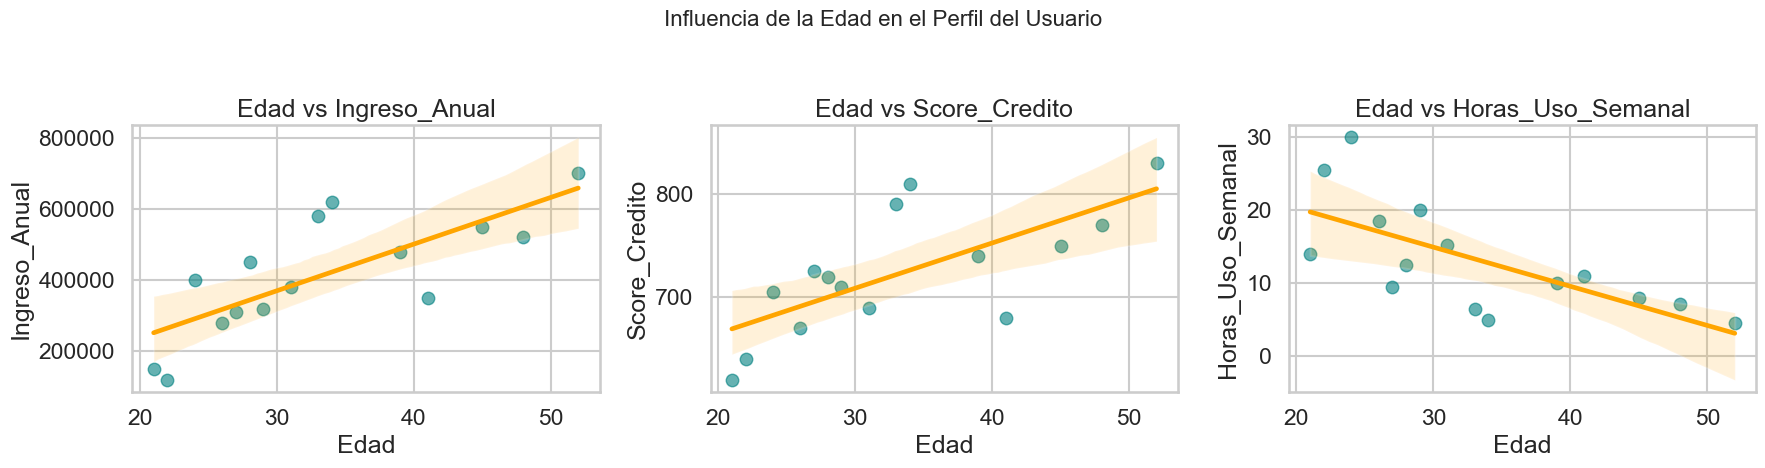

C:\Users\Jaime\AppData\Local\Temp\ipykernel_10252\3456814662.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genero', y='Edad', data=df2, palette="Set2")


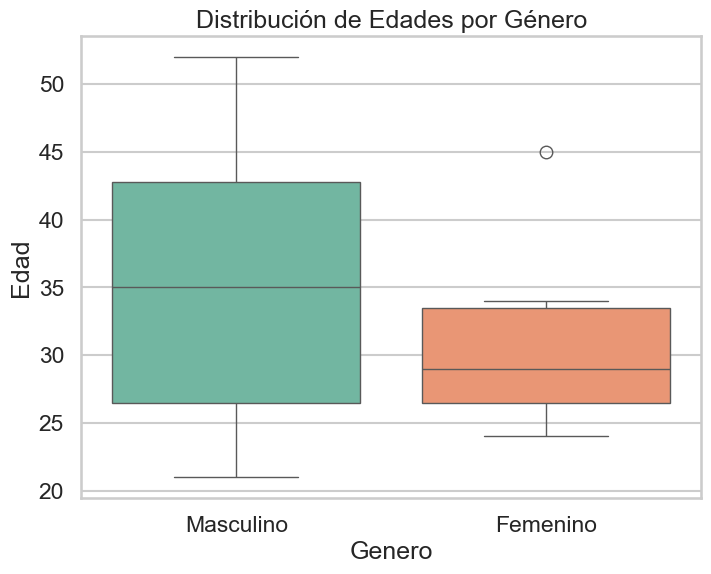

C:\Users\Jaime\AppData\Local\Temp\ipykernel_10252\3456814662.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Suscripcion_Tipo', y='Edad', data=df2, inner="stick", palette="coolwarm")


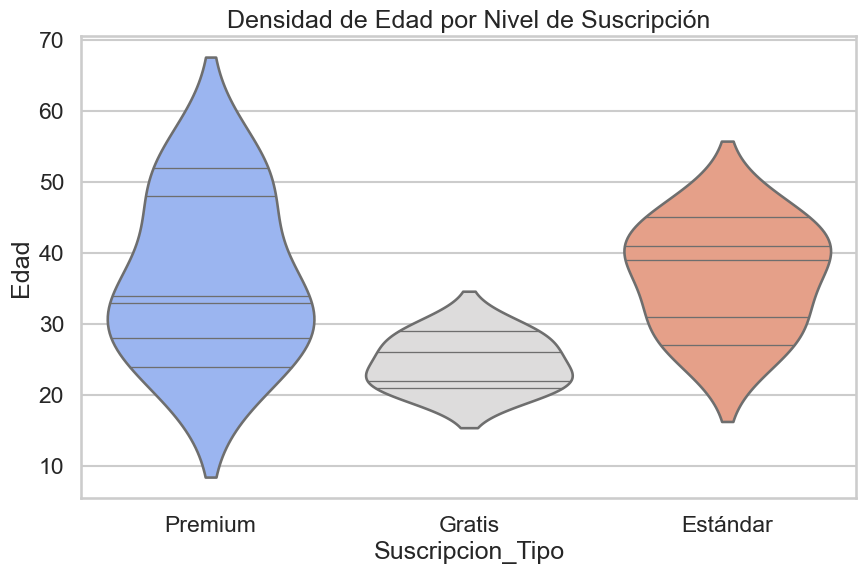

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Relación de Edad con variables numéricas (Tendencias)
# Este bloque crea una fila de gráficas comparando Edad contra Ingreso, Score y Uso.
cols_numericas = ['Ingreso_Anual', 'Score_Credito', 'Horas_Uso_Semanal']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Influencia de la Edad en el Perfil del Usuario', fontsize=16)

for i, col in enumerate(cols_numericas):
    sns.regplot(ax=axes[i], x='Edad', y=col, data=df2, 
                scatter_kws={'alpha':0.6, 'color':'teal'}, 
                line_kws={'color':'orange'})
    axes[i].set_title(f'Edad vs {col}')
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 2. Edad vs Género (¿Hay sesgo generacional en la captación?)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Genero', y='Edad', data=df2, palette="Set2")
plt.title('Distribución de Edades por Género')
plt.show()

# 3. Edad vs Suscripción (Segmentación de Producto)
# ¿Los jóvenes prefieren lo gratis y los adultos lo premium?
plt.figure(figsize=(10, 6))
sns.violinplot(x='Suscripcion_Tipo', y='Edad', data=df2, inner="stick", palette="coolwarm")
plt.title('Densidad de Edad por Nivel de Suscripción')
plt.show()